In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from help_plot import plot_decision_regions

# Random Forests

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

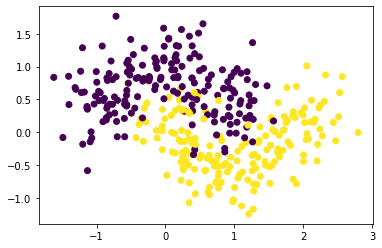

In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

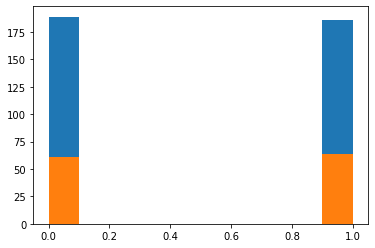

In [5]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

# Zad. 

Porównaj działanie

```python
BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
```

i

```python
RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
```

In [10]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

bc = BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=16,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
    

In [11]:
rfc = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [14]:
from sklearn import metrics
import pandas as pd
classifiers = [bc, rfc]
d = {'precision_score': [metrics.precision_score(y_train, clf.predict(X_train), average='weighted') for clf in classifiers], 
     'recall_score': [metrics.recall_score(y_train, clf.predict(X_train), average='weighted') for clf in classifiers], 
     'f1_score': [metrics.f1_score(y_train, clf.predict(X_train), average='weighted') for clf in classifiers],
     'accuracy_score' : [metrics.accuracy_score(y_train, clf.predict(X_train)) for clf in classifiers]
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['bc', 'rfc'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,bc,0.949344,0.949333,0.949332,0.949333
1,rfc,0.952047,0.952000,0.951997,0.952000


# Ciekawostka - Extra-Trees 


* Gdy budujemy kolejne drzewa  w losowym lesie, w każdym węźle rozpatrywany jest losowy podzbiór elementów do podziału. 

* Możliwe jest stworzenie drzewa jeszcze bardziej losowego, wykorzystując losowe podziały dla każdej cechy, zamiast szukać najlepszych możliwych podziału (jak w przypadku zwykłych drzew decyzyjnych).

* Taki las losowy nazywa się **Extremely Randomized Trees** (lub **Extra-Trees** w skrócie). 

* Możesz utworzyć klasyfikator **Extremely Randomized Trees** za pomocą klasy **ExtraTreesClassifier** z Scikit-Learn. 

* Jego API jest identyczne z klasą RandomForestClassifier. 


# Zad.

Naucz 

```python
ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
```

i porównaj z powyższymi.

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
etc = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
etc.fit(X_train, y_train)
classifiers.append(etc)

In [22]:
d = {'precision_score': [metrics.precision_score(y_train, clf.predict(X_train), average='weighted') for clf in classifiers], 
     'recall_score': [metrics.recall_score(y_train, clf.predict(X_train), average='weighted') for clf in classifiers], 
     'f1_score': [metrics.f1_score(y_train, clf.predict(X_train), average='weighted') for clf in classifiers],
     'accuracy_score' : [metrics.accuracy_score(y_train, clf.predict(X_train)) for clf in classifiers]
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['bc', 'rfc', 'etc'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,bc,0.949344,0.949333,0.949332,0.949333
1,rfc,0.952047,0.952000,0.951997,0.952000
2,etc,0.930851,0.930667,0.930653,0.930667
